#### <h1> <center> ENGG680 A4 </center></h1>
<h2> <center> Assignment 4: Visualization (9 points)</center></h2>
<center>
<div class="alert alert-block alert-info">
Due: Friday Mar 18 (midnight). To be submitted on D2L.
</div></center>

Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`. Test your code and when you were done, download this notebook as an `.ipynb` file and submit it to D2L. To get this file, in Jupyter notebook you can go to File -> Download as -> Notebook(.ipynb)

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis on the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so I have created one saved as chicken.csv. There are differences in the numbers, but the character should be the same.


     

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 0 read in the data (0.5 pts)

In [20]:
df = pd.read_csv('chicken.csv')
print(df)

     week  age diet  weight  eggs
0       0  147    A  3106.2     4
1       0  157    A  2891.7     5
2       0  163    A  2958.3     4
3       0  145    A  3188.7     5
4       0  162    A  3491.7     5
..    ...  ...  ...     ...   ...
355    22  212    C  2966.5     4
356    22  176    C  3927.9     4
357    22  180    C  3361.6     5
358    22  193    C  3804.4     5
359    22  210    C  4046.7     3

[360 rows x 5 columns]


### 1 Weight by diet summary stats (Pandas groupby and describe) (0.5 pts)

In [55]:
unstacked_df = df.groupby(['diet', 'week']).mean().unstack(level=0)
print(unstacked_df['weight'])

diet        A        B        C
week                           
0     3069.50  2962.86  3054.49
2     3162.29  3028.41  3115.87
4     3257.86  3095.40  3178.51
6     3356.32  3163.87  3242.40
8     3457.77  3233.86  3307.55
10    3562.28  3305.40  3374.05
12    3669.95  3378.53  3441.86
14    3780.88  3453.25  3511.05
16    3895.17  3529.65  3581.60
18    4012.89  3607.72  3653.61
20    4134.19  3687.54  3727.04
22    4259.13  3769.10  3801.95


### 2 Eggs by diet summary stats (Pandas groupby and describe) (1 pts)

In [58]:
unstacked_df = df.groupby(['diet', 'week']).mean().unstack(level=0)
print(unstacked_df['eggs'])

diet    A    B    C
week               
0     4.6  4.4  4.6
2     4.5  3.8  4.2
4     4.6  4.2  4.0
6     4.4  4.2  4.1
8     4.2  3.9  4.3
10    4.6  3.9  4.2
12    4.3  3.9  4.0
14    4.6  4.1  4.2
16    4.3  4.0  4.0
18    4.4  4.0  4.3
20    4.7  4.0  4.0
22    4.6  4.0  4.2


### Plots Methods

In [126]:
def histogramplot(x_list, x_label, y_label, title):
    plt.style.use('fivethirtyeight')
    plt.hist(x_list, edgecolor='black', color='#F6B87D')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # plt.tight_layout()
    plt.show()
    
def boxplot(x_list, y_label, title, labels, colors):
    plt.style.use('fivethirtyeight')
    box = plt.boxplot(x_list, labels=labels, patch_artist=True)
    # plt.xlabel(x_label, color="#008fd5")
    
    # colors = ['#444444', '#008fd5', '#e5ae38']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        
    plt.ylabel(y_label)
    plt.title(title)
    # plt.tight_layout()
    plt.show()
    
def scatterplot(x_list1, y_list1, x_list2, y_list2, x_list3, y_list3, x_label, y_label, title, label):
    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x_list1, y_list1, s=25, color="#444444", label=label[0])
    ax1.scatter(x_list2, y_list2, s=25, color="#008fd5", label=label[1])
    ax1.scatter(x_list3, y_list3, s=25, color="#e5ae38", label=label[2])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    # plt.tight_layout()
    plt.show()
    
def lineplot(x_list, y_list1, y_list2, y_list3, x_label, y_label, title, label):
    plt.style.use('fivethirtyeight')
    plt.plot(x_list, y_list1, label=label[0], color="#444444")
    plt.plot(x_list, y_list2, label=label[1], color="#008fd5")
    plt.plot(x_list, y_list3, label=label[2], color="#e5ae38")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # plt.fill_between(x_list, y_list1, interpolate=True, alpha=0.20)
    plt.legend()
    #plt.tight_layout()
    plt.show()
    
def barplot(x_list, y_list, x_label, y_label, title):
    plt.style.use('fivethirtyeight')
    plt.bar(x_list, y_list, label='Max', width=0.25, color="#F6B87D")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # plt.legend()
    # plt.tight_layout()
    plt.show()
    
def barplotMultiple(x_list, y_list1, y_list2, y_list3, x_label, y_label, title, label):
    plt.style.use('fivethirtyeight')
    x_indexes = np.arange(len(x_list))
    width = 0.25
    plt.bar(x_indexes-width, y_list1, label=label[0], linestyle='--', width=width, color="#444444")
    plt.bar(x_indexes, y_list2, label=label[1], width=width, color="#008fd5")
    plt.bar(x_indexes+width, y_list3, label=label[2], width=width, color="#e5ae38")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(ticks=x_indexes, labels=x_list)
    plt.legend()
    # plt.tight_layout()
    plt.show()

### 3 Histogram of age of chickens (Pandas hist()) (1 pts)

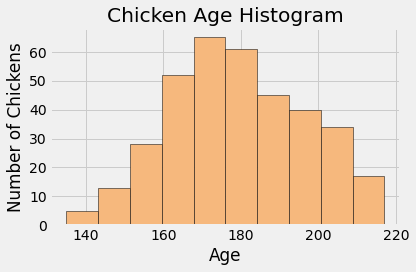

In [32]:
age_list = df['age'].to_list()
histogramplot(age_list, "Age", "Number of Chickens", "Chicken Age Histogram")

### 4 Boxplot age (Pandas boxplot()) (1 pts)

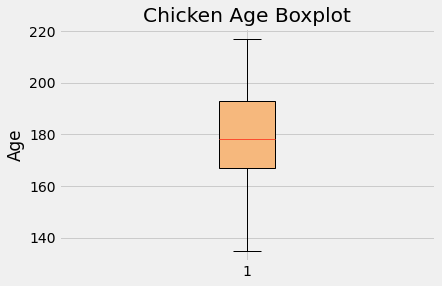

In [127]:
age_list = df['age'].to_list()
boxplot(age_list, "Age", "Chicken Age Boxplot", "1", ['#F6B87D'])

### 5 Plot average weight vs weeks by diet (Pandas plot() on groupby()) (1 pts)
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

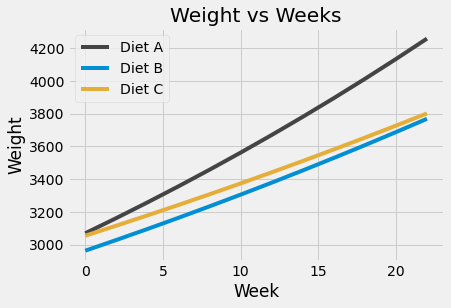

In [53]:
unstacked_df = df.groupby(['diet', 'week']).mean().unstack(level=0)
# print(unstacked_df['weight'])
week_list = df['week'].to_list()
week_list_unique = []
[week_list_unique.append(x) for x in week_list if x not in week_list_unique]
lineplot(week_list_unique, unstacked_df['weight']['A'].to_list(),
         unstacked_df['weight']['B'].to_list(),
         unstacked_df['weight']['C'].to_list(), 
         "Week", "Weight", "Weight vs Weeks", ["Diet A", "Diet B", "Diet C"])

### 6 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) (1 pts) 
Hint: It might be good to start y axis at 0

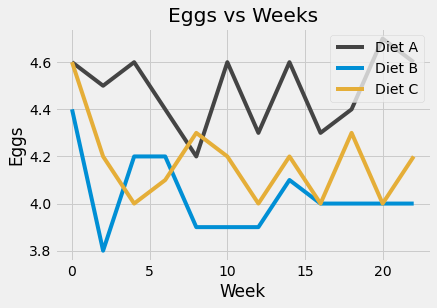

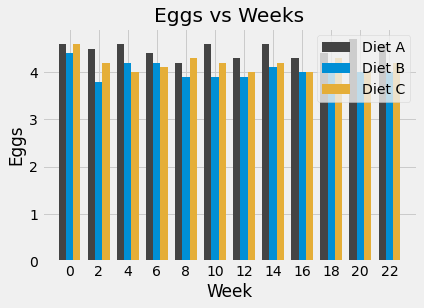

In [79]:
unstacked_df = df.groupby(['diet', 'week']).mean().unstack(level=0)
# print(unstacked_df['eggs'])
week_list = df['week'].to_list()
week_list_unique = []
[week_list_unique.append(x) for x in week_list if x not in week_list_unique]
lineplot(week_list_unique, unstacked_df['eggs']['A'].to_list(),
         unstacked_df['eggs']['B'].to_list(),
         unstacked_df['eggs']['C'].to_list(), 
         "Week", "Eggs", "Eggs vs Weeks", ["Diet A", "Diet B", "Diet C"])
barplotMultiple(week_list_unique, unstacked_df['eggs']['A'].to_list(),
                unstacked_df['eggs']['B'].to_list(),
                unstacked_df['eggs']['C'].to_list(),
                "Week", "Eggs", "Eggs vs Weeks", ["Diet A", "Diet B", "Diet C"])

### 7. Average age by diet stats (Pandas groupby()) (1 pts)

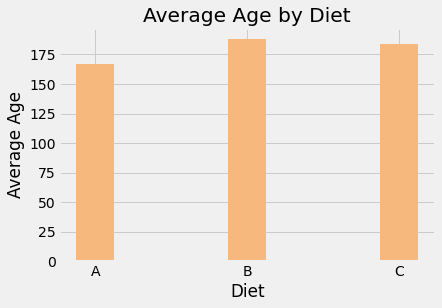

In [74]:
unstacked_df = df.groupby(['diet']).mean()
# print(unstacked_df)
barplot(['A', 'B', 'C'], unstacked_df['age'].to_list(), "Diet", "Average Age", "Average Age by Diet")

### 8 Scatter plot eggs vs age by diet (Pandas plot.scatter()) (1 pts)
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


     week  age diet  weight  eggs
20      0  164    C  3370.3     5
21      0  170    C  3622.3     4
22      0  184    C  2832.1     5
23      0  152    C  3257.5     4
24      0  193    C  2915.5     4
..    ...  ...  ...     ...   ...
355    22  212    C  2966.5     4
356    22  176    C  3927.9     4
357    22  180    C  3361.6     5
358    22  193    C  3804.4     5
359    22  210    C  4046.7     3

[120 rows x 5 columns]


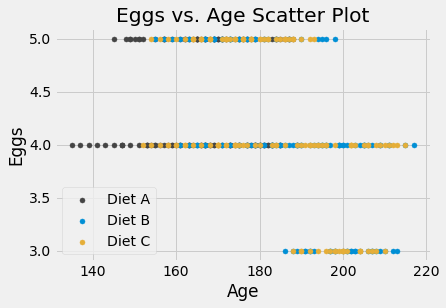

In [94]:
diet_A_df = df.loc[df["diet"] == 'A']
diet_B_df = df.loc[df["diet"] == 'B']
diet_C_df = df.loc[df["diet"] == 'C']
print(diet_C_df)
scatterplot(diet_A_df['age'], diet_A_df['eggs'],
            diet_B_df['age'], diet_B_df['eggs'],
            diet_C_df['age'], diet_C_df['eggs'],
            "Age", "Eggs", "Eggs vs. Age Scatter Plot", ["Diet A", "Diet B", "Diet C"])

### 9 Boxplot age by diet (Pandas boxplot()) (1 pts)

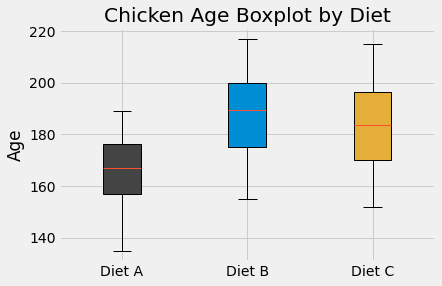

In [129]:
diet_A_df = df.loc[df["diet"] == 'A']
diet_B_df = df.loc[df["diet"] == 'B']
diet_C_df = df.loc[df["diet"] == 'C']
# print(diet_C_df)
age_list = []
age_list.append(diet_A_df['age'].to_list())
age_list.append(diet_B_df['age'].to_list())
age_list.append(diet_C_df['age'].to_list())
# print(age_list[2])
boxplot(age_list, "Age", "Chicken Age Boxplot by Diet", ["Diet A", "Diet B", "Diet C"], colors = ['#444444', '#008fd5', '#e5ae38'])